In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
G = 200
M = 0.1
P = 500
Dn = 20

In [3]:
from __future__ import print_function

In [4]:
r = np.random.random((Dn))
def f(x):
    return ((x - r)**4).sum()
print(r)

[0.20852315 0.37990322 0.81526567 0.40120023 0.83495341 0.70433796
 0.63527978 0.71498703 0.91501536 0.86399704 0.24553359 0.68561509
 0.69743761 0.80697528 0.33441254 0.82021852 0.91660806 0.84834148
 0.79936442 0.21314286]


In [5]:
n = np.random.random((Dn))
f(n)

1.388471925172265

In [6]:
def generate_population():
    population = []
    for _ in range(P):
        population.append(np.random.uniform(-10 , 10 , (Dn)))
    return population

In [7]:
def crossover(parent1 , parent2):
    child1 = np.zeros(parent1.shape)
    child2 = np.zeros(parent2.shape)
    
    dim = parent1.shape[0]//2
    child1[:dim] = parent1[:dim]
    child1[dim:] = parent2[dim:]
    
    child2[:dim] = parent2[:dim]
    child2[dim:] = parent1[dim:]
    
    return child1 , child2

def mutate(x):
    for i in range(x.shape[0]):
        R = np.random.random()
        if R < M:
            x[i] = np.random.uniform(-5 , 5)
    return x

In [8]:
loss = []
pop = generate_population()
for epoch in range(G):
    pop = sorted(pop, key=lambda z: f(z))
    print("Generation : {} | loss : {}".format(epoch , f(pop[0])))
    loss.append(f(pop[0]))
    
    temp = []
    while len(temp) < P:
        parent1 , parent2 = random.sample(pop[:int(P/2)],2)
        c1 , c2 = crossover(parent1 , parent2)
        c1 , c2 = mutate(c1) , mutate(c2)
        temp.append(c1)
        temp.append(c2)
        
    comb = temp+pop
    pop = sorted(comb, key=lambda z: f(z))[:P]

Generation : 0 | loss : 10230.726720281278
Generation : 1 | loss : 7349.964386199867
Generation : 2 | loss : 4302.691768101404
Generation : 3 | loss : 2479.7044427200794
Generation : 4 | loss : 883.6499338409608
Generation : 5 | loss : 883.6499338409608
Generation : 6 | loss : 831.2130648496155
Generation : 7 | loss : 535.5459724919341
Generation : 8 | loss : 514.292170616013
Generation : 9 | loss : 236.460909545173
Generation : 10 | loss : 236.460909545173
Generation : 11 | loss : 236.460909545173
Generation : 12 | loss : 156.85085290341928
Generation : 13 | loss : 119.36818274576265
Generation : 14 | loss : 84.63366109656452
Generation : 15 | loss : 84.63366109656452
Generation : 16 | loss : 62.34036021237269
Generation : 17 | loss : 62.34036021237269
Generation : 18 | loss : 62.34036021237269
Generation : 19 | loss : 52.76885115002757
Generation : 20 | loss : 52.76885115002757
Generation : 21 | loss : 45.335131201276056
Generation : 22 | loss : 45.335131201276056
Generation : 23 | l

Generation : 187 | loss : 0.0016353129270508726
Generation : 188 | loss : 0.0016353129270508726
Generation : 189 | loss : 0.0016353129270508726
Generation : 190 | loss : 0.0016353129270508726
Generation : 191 | loss : 0.001551531722143191
Generation : 192 | loss : 0.0011686942449794346
Generation : 193 | loss : 0.0011686942449794346
Generation : 194 | loss : 0.0011686942449794346
Generation : 195 | loss : 0.0011686942449794346
Generation : 196 | loss : 0.0011686942449794346
Generation : 197 | loss : 0.0011686942449794346
Generation : 198 | loss : 0.0011686942449794346
Generation : 199 | loss : 0.0009399770348182444


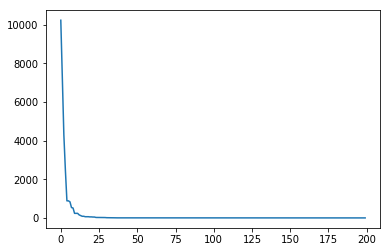

In [10]:
plt.plot(loss)

In [11]:
pop[0] , r

(array([0.22063736, 0.46168877, 0.87790578, 0.53710908, 0.8047196 ,
        0.67370509, 0.58418035, 0.746163  , 0.87845283, 0.82458159,
        0.15583464, 0.68753042, 0.70271312, 0.72531012, 0.26750223,
        0.69329349, 1.02091544, 0.84190441, 0.78502348, 0.14824015]),
 array([0.20852315, 0.37990322, 0.81526567, 0.40120023, 0.83495341,
        0.70433796, 0.63527978, 0.71498703, 0.91501536, 0.86399704,
        0.24553359, 0.68561509, 0.69743761, 0.80697528, 0.33441254,
        0.82021852, 0.91660806, 0.84834148, 0.79936442, 0.21314286]))